In [2]:
import os
os.system('pip install yfinance pandas numpy matplotlib')


0

In [4]:
import yfinance as yf
import pandas as pd

# Download historical data for 3 stocks
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2018-01-01', end='2023-12-31', auto_adjust=True)['Close']

# Show the first few rows
data.head()



[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT
Date,,,
2018-01-02,40.426830,53.405170,79.328537
2018-01-03,40.419792,54.316319,79.697708
2018-01-04,40.607529,54.527306,80.399162
2018-01-05,41.069855,55.250351,81.395950
2018-01-08,40.917328,55.445419,81.479027


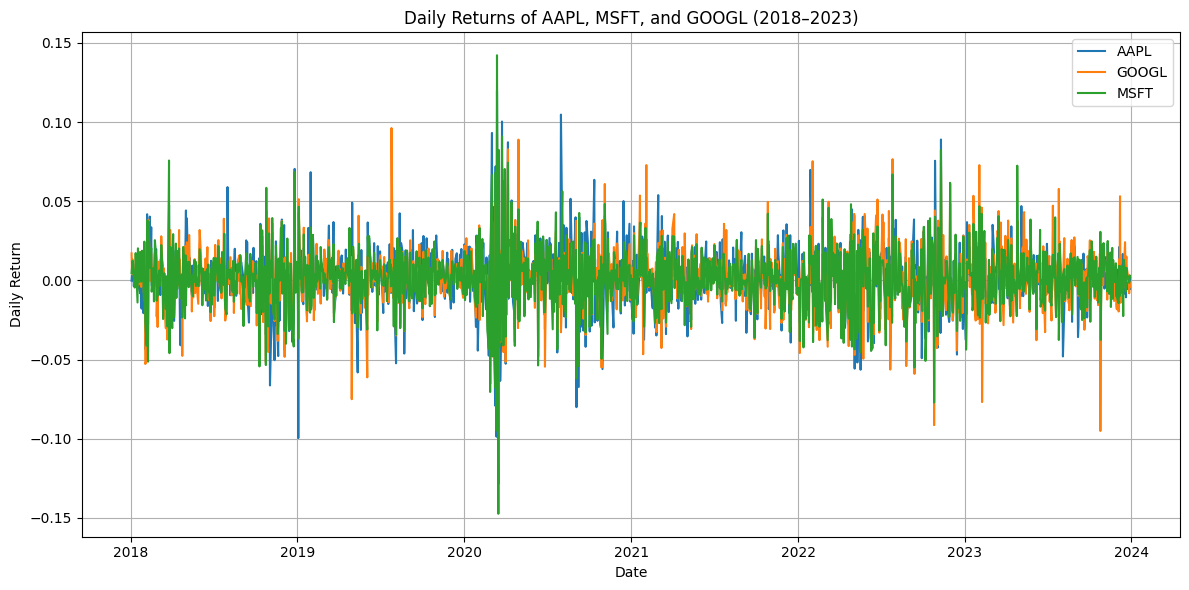

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Plot daily returns
plt.figure(figsize=(12, 6))
for ticker in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)

plt.title('Daily Returns of AAPL, MSFT, and GOOGL (2018–2023)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


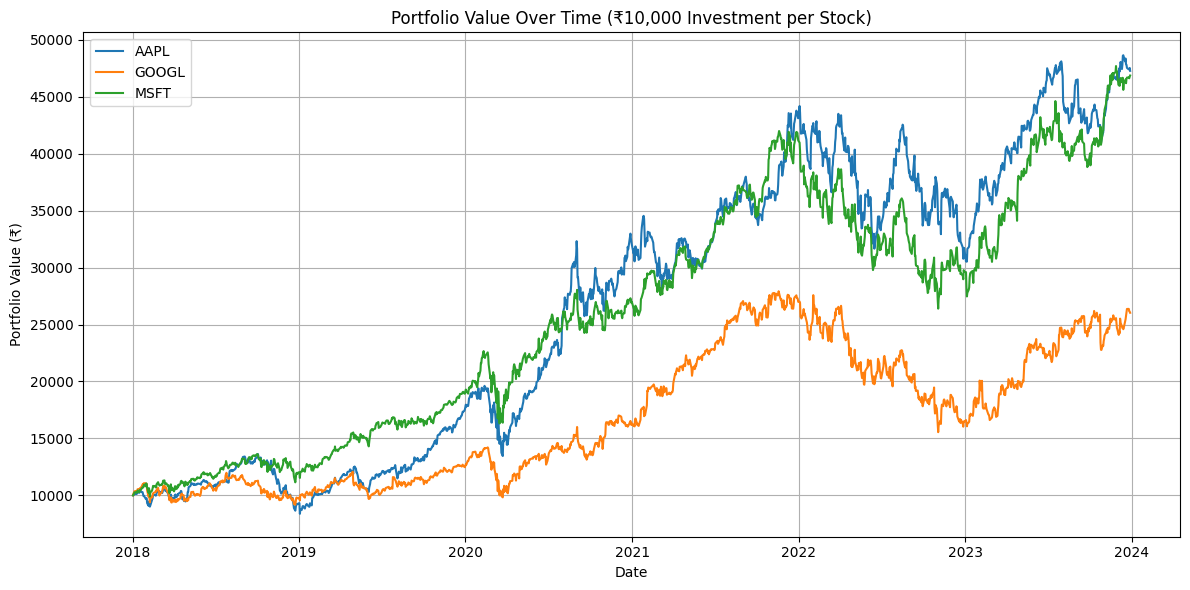

In [6]:
# Simulate ₹10,000 investment in each stock
initial_investment = 10000

# Normalize prices (starting at 1) and scale to initial investment
normalized_prices = data / data.iloc[0]
investment_value = normalized_prices * initial_investment

# Plot portfolio growth
plt.figure(figsize=(12, 6))
for ticker in investment_value.columns:
    plt.plot(investment_value.index, investment_value[ticker], label=ticker)

plt.title('Portfolio Value Over Time (₹10,000 Investment per Stock)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


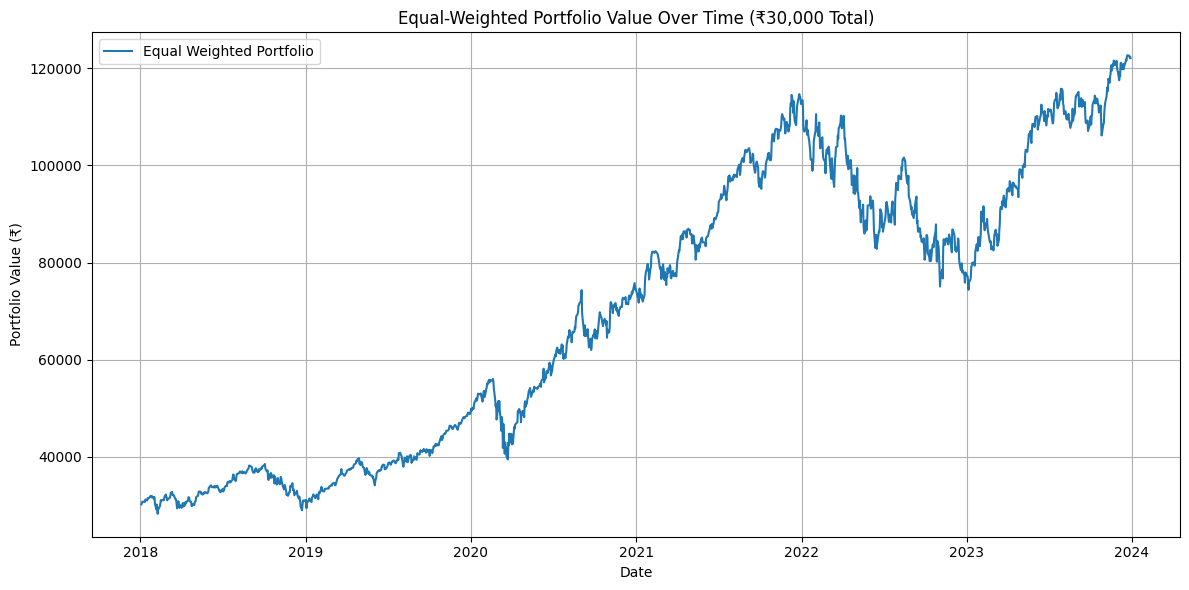

In [7]:
# Equal allocation to all 3 stocks
weights = np.array([1/3, 1/3, 1/3])

# Calculate daily portfolio value
daily_returns = data.pct_change().dropna()
weighted_daily_returns = (daily_returns * weights).sum(axis=1)

# Portfolio value over time (starting from ₹30,000 total)
initial_investment = 30000
portfolio_value = (1 + weighted_daily_returns).cumprod() * initial_investment

# Plot
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value, label='Equal Weighted Portfolio')
plt.title('Equal-Weighted Portfolio Value Over Time (₹30,000 Total)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


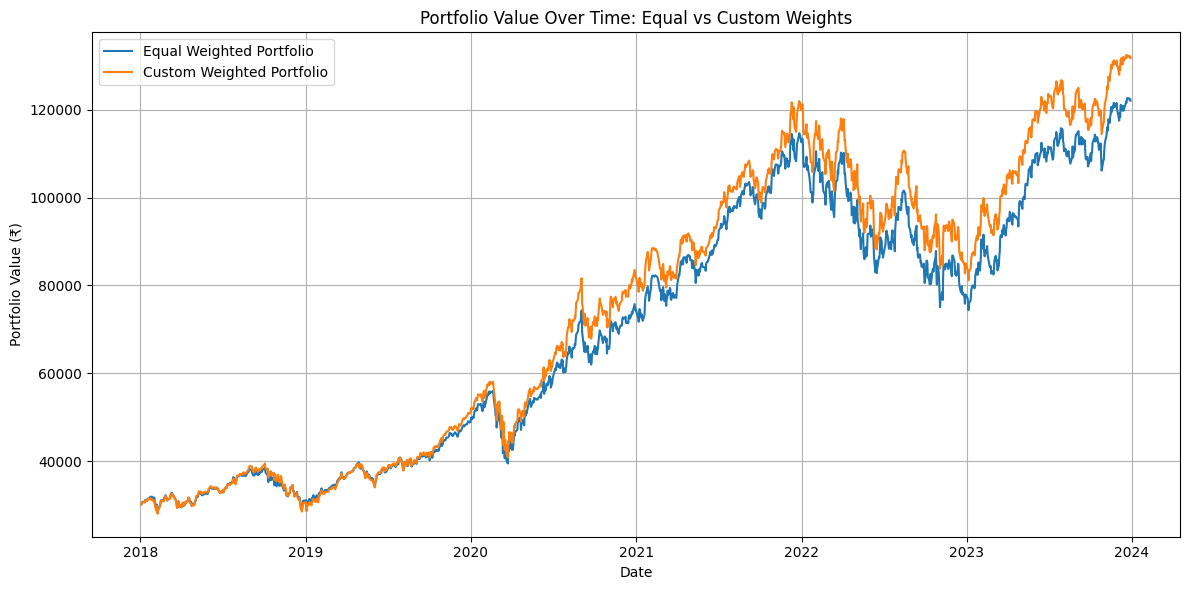

In [8]:
# Define custom weights here (sum should be 1)
custom_weights = np.array([0.5, 0.2, 0.3])  # Example: 50% AAPL, 20% MSFT, 30% GOOGL

# Calculate weighted daily returns
weighted_custom_returns = (daily_returns * custom_weights).sum(axis=1)

# Portfolio value over time (₹30,000 initial investment)
initial_investment = 30000
custom_portfolio_value = (1 + weighted_custom_returns).cumprod() * initial_investment

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value, label='Equal Weighted Portfolio')
plt.plot(custom_portfolio_value.index, custom_portfolio_value, label='Custom Weighted Portfolio')
plt.title('Portfolio Value Over Time: Equal vs Custom Weights')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import sqlite3

# Connect to SQLite database (or create if doesn't exist)
conn = sqlite3.connect('finance_project.db')
cursor = conn.cursor()

# Save portfolio values to SQL table
portfolio_value_df = portfolio_value.reset_index()
portfolio_value_df.columns = ['Date', 'Equal_Weighted_Value']

custom_portfolio_value_df = custom_portfolio_value.reset_index()
custom_portfolio_value_df.columns = ['Date', 'Custom_Weighted_Value']

# Merge both portfolios into one DataFrame
portfolio_df = portfolio_value_df.merge(custom_portfolio_value_df, on='Date')

# Write DataFrame to SQL table (replace if exists)
portfolio_df.to_sql('portfolio_performance', conn, if_exists='replace', index=False)

print("Data saved to SQLite database 'finance_project.db' successfully.")

conn.close()


Data saved to SQLite database 'finance_project.db' successfully.


In [10]:
# Export portfolio data to CSV file
portfolio_df.to_csv('portfolio_performance.csv', index=False)
print("CSV file saved as 'portfolio_performance.csv'")


CSV file saved as 'portfolio_performance.csv'


In [11]:
import os
print(os.getcwd())


C:\Users\Adarsh Gowda


In [12]:
portfolio_df.to_csv(r'C:\Users\Adarsh Gowda\Documents\portfolio_performance.csv', index=False)
print("CSV saved to Download folder.")


CSV saved to Download folder.


In [13]:
portfolio_df.to_csv(r'C:\Users\Adarsh Gowda\Desktop\portfolio_performance.csv', index=False)
print("CSV saved to Desktop.")


CSV saved to Desktop.
